<a href="https://colab.research.google.com/github/suwannee-mauy/DADS6003/blob/main/6620422030_Assignment3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#df = pd.read_csv('/content/drive/MyDrive/ML/smartphone-reponse.csv')
#df = pd.read_csv('/content/drive/ไดร์ฟของฉัน/DADS6003/Smartphone (Responses).csv')

#df = pd.read_csv('https://drive.google.com/drive/folders/1vFmBsji1zDalsBj4J3Mj-ycrw51Wp3MN?usp=drive_link/Smartphone (Responses).csv')

InvalidURL: URL can't contain control characters. '/drive/folders/1vFmBsji1zDalsBj4J3Mj-ycrw51Wp3MN?usp=drive_link/Smartphone (Responses).csv' (found at least ' ')

In [ ]:
#data_1 = pd.read_csv('D:/DADS6003/Smartphone (Responses).csv')
#data_1.shape

(75, 12)

In [ ]:
columns = ['เพศของผู้ตอบแบบสอบถาม',
 'ช่วงอายุของผู้ตอบแบบสอบถาม',
 'อาชีพของผู้ตอบแบบสอบถาม',
 'ช่วงเงินเดือนของผู้ตอบแบบสอบถาม',
 'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]',
 'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]',
 'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]',
 'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]',
 'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด']

In [ ]:
# Drop Field ที่ไม่ใช้
data_2 = data_1.drop(['Timestamp','จากข้อที่แล้ว เนื่องจากสาเหตุใด'], axis=1)
data_2.shape

(75, 10)

In [ ]:
# Filter เฉพาะที่เป็น IOS หรือ Android
data_3 = data_2[(data_2['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'] == 'IOS') | (data_2['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'] == 'Android')]
data_3.head(3)

,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด
1,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone
2,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone
3,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone


In [ ]:
# แปลงค่า
data_3 = pd.get_dummies(data_3, columns=columns)
data_3.head(3)

,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,เพศของผู้ตอบแบบสอบถาม_-,เพศของผู้ตอบแบบสอบถาม_ชาย,เพศของผู้ตอบแบบสอบถาม_หญิง,ช่วงอายุของผู้ตอบแบบสอบถาม_21-25 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_26-30 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_31-35 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_36-40 ปี,อาชีพของผู้ตอบแบบสอบถาม_.,อาชีพของผู้ตอบแบบสอบถาม_Freelancer,...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยครั้ง,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยที่สุด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_ปานกลาง,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Google,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Iphone,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Nokia,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oneplus,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oppo,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Samsung,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_ยังไม่รู้
1,IOS,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,IOS,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,IOS,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
data_3 = data_3.replace({True: 1, False: 0})
data_3.head(3)

,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,เพศของผู้ตอบแบบสอบถาม_-,เพศของผู้ตอบแบบสอบถาม_ชาย,เพศของผู้ตอบแบบสอบถาม_หญิง,ช่วงอายุของผู้ตอบแบบสอบถาม_21-25 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_26-30 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_31-35 ปี,ช่วงอายุของผู้ตอบแบบสอบถาม_36-40 ปี,อาชีพของผู้ตอบแบบสอบถาม_.,อาชีพของผู้ตอบแบบสอบถาม_Freelancer,...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยครั้ง,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยที่สุด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_ปานกลาง,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Google,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Iphone,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Nokia,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oneplus,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oppo,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Samsung,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_ยังไม่รู้
1,IOS,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,IOS,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,IOS,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# แทนค่า "IOS": 1, 'Android': 0
data_3['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'] = data_3["ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด"].replace({"IOS": 1, "Android": 0})
data_3.info()  #เช็ค null

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 1 to 74
Data columns (total 48 columns):
 #   Column                                                                     Non-Null Count  Dtype
---  ------                                                                     --------------  -----
 0   ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด                                   71 non-null     int64
 1   เพศของผู้ตอบแบบสอบถาม_-                                                    71 non-null     int64
 2   เพศของผู้ตอบแบบสอบถาม_ชาย                                                  71 non-null     int64
 3   เพศของผู้ตอบแบบสอบถาม_หญิง                                                 71 non-null     int64
 4   ช่วงอายุของผู้ตอบแบบสอบถาม_21-25 ปี                                        71 non-null     int64
 5   ช่วงอายุของผู้ตอบแบบสอบถาม_26-30 ปี                                        71 non-null     int64
 6   ช่วงอายุของผู้ตอบแบบสอบถาม_31-35 ปี                                        71 non

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data_3.drop(['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'], axis=1)
y = data_3['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train a Logistic regression model
logistic_model.fit(X_train, y_train)

# Test the model
accuracy = logistic_model.score(X_test, y_test)
accuracy

0.8181818181818182

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3624 (\N{THAI CHARACTER SO SALA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anacond

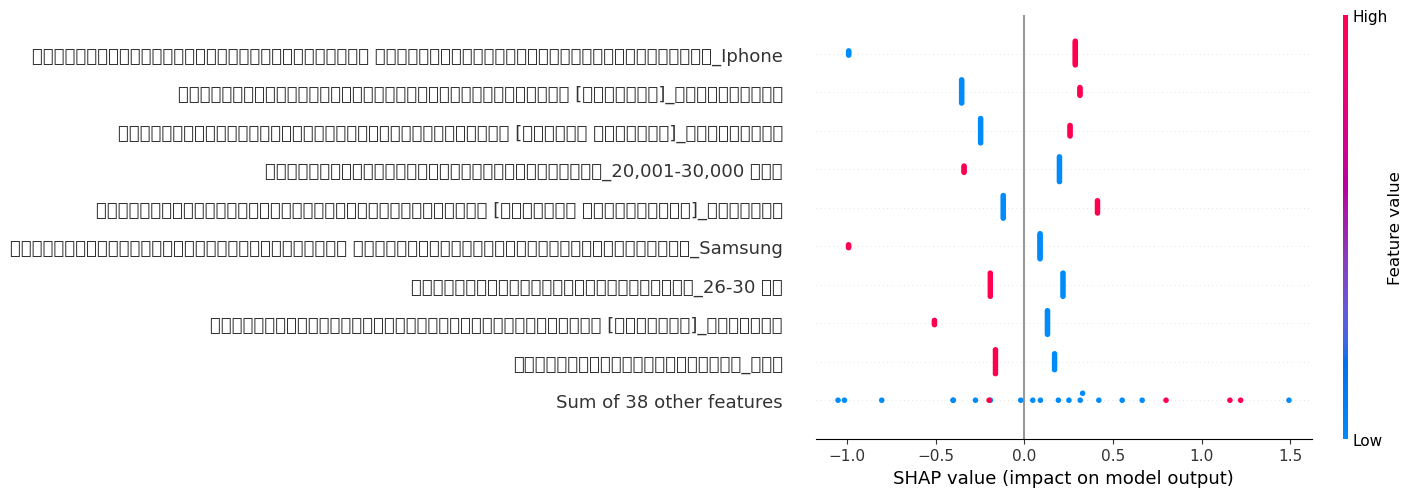

<module 'shap.plots' from 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\shap\\plots\\__init__.py'>

In [ ]:
import shap
from sklearn.metrics import classification_report

print(classification_report(y_test, logistic_model.predict(X_test)))

explainer = shap.Explainer(logistic_model, X_train, feature_names=data_3.columns.tolist())
shap_values = explainer(X_test)


shap.plots.initjs()
shap.plots.beeswarm(shap_values)
shap.plots

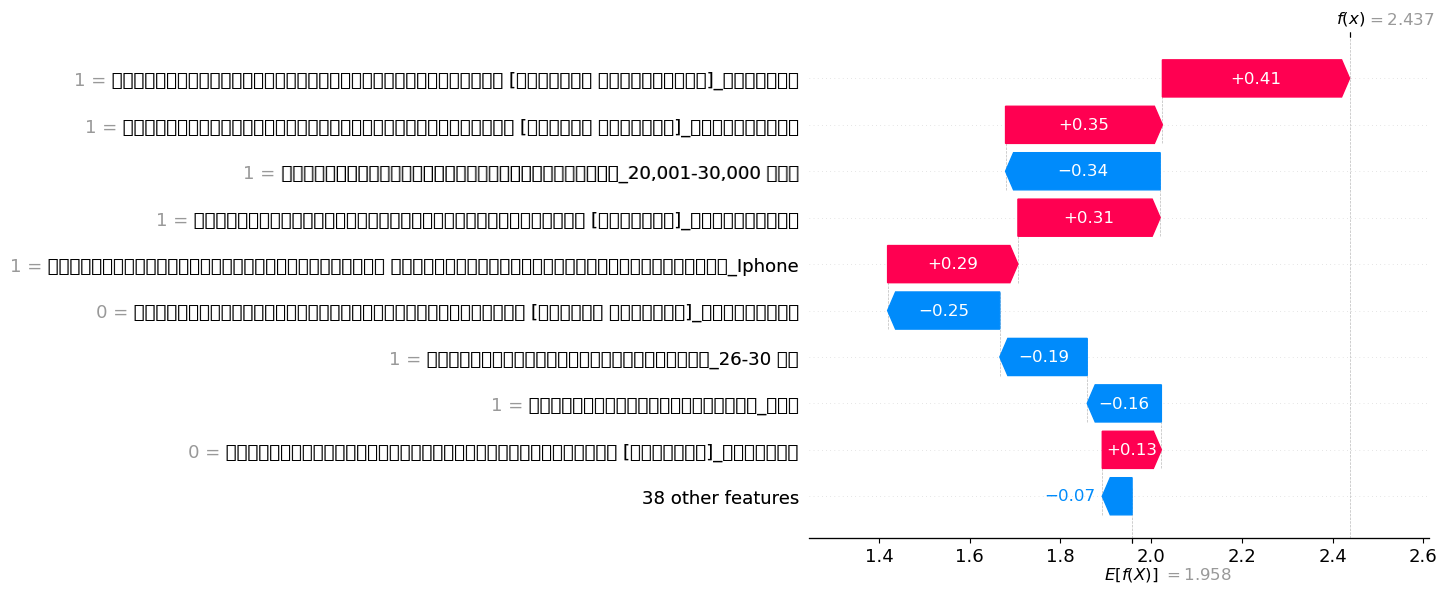

In [ ]:
 shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3597 (\N{THAI CHARACTER YO YING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


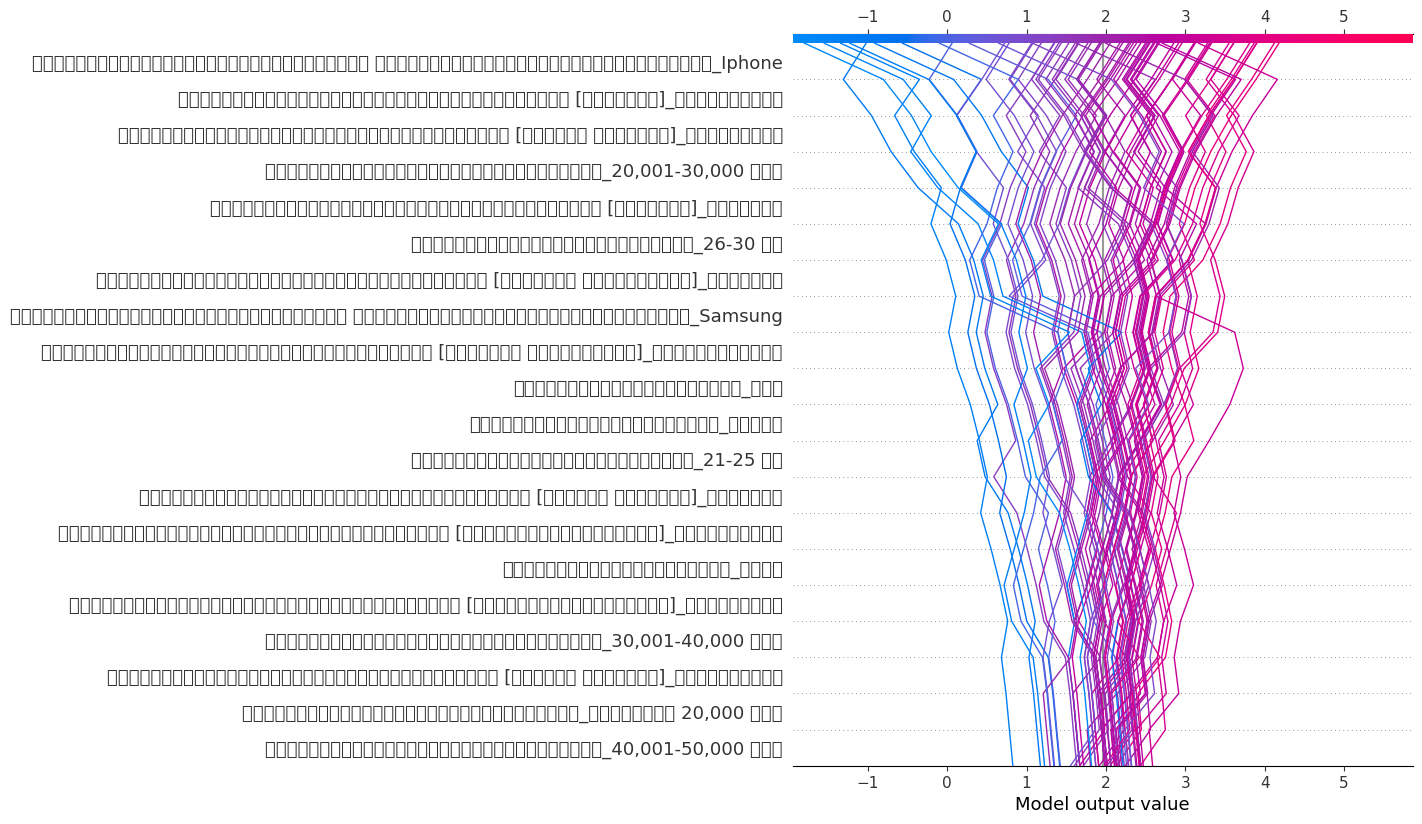

In [ ]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X),
                   feature_names = list(X.columns))